In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data =  {'eng':[10,30,50,70,60],
         'kor':[20,40,60,80,75],
         'math':[90,50,20,70,30]}
df = pd.DataFrame(data, index=['a','b','c','d','e'] )
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70
e,60,75,30


### 반복문

In [3]:
for n in df: # default : df.columns
    print(n)

eng
kor
math


In [4]:
for n in df.index:
    print(n)

a
b
c
d
e


In [5]:
for n in df.values:
    print(n)

[10 20 90]
[30 40 50]
[50 60 20]
[70 80 70]
[60 75 30]


In [6]:
for c, sr in df.items(): # 컬럼명, 시리즈로 묶여있음
    print(c, sr.loc['a'], sr.loc['b'], sr.loc['c'], sr.loc['d'])
    print('='*30) 

eng 10 30 50 70
kor 20 40 60 80
math 90 50 20 70


In [7]:
for n in df.iterrows(): #인덱스명, 시리즈 형태
    print( n )
    print('='*30)

('a', eng     10
kor     20
math    90
Name: a, dtype: int64)
('b', eng     30
kor     40
math    50
Name: b, dtype: int64)
('c', eng     50
kor     60
math    20
Name: c, dtype: int64)
('d', eng     70
kor     80
math    70
Name: d, dtype: int64)
('e', eng     60
kor     75
math    30
Name: e, dtype: int64)


In [8]:
for i, sr in df.iterrows(): #인덱스명, 시리즈 형태
    print( i, sr.loc['eng'], sr.loc['kor'], sr.loc['math'] )
    print('='*30)

a 10 20 90
b 30 40 50
c 50 60 20
d 70 80 70
e 60 75 30


### 시각화

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

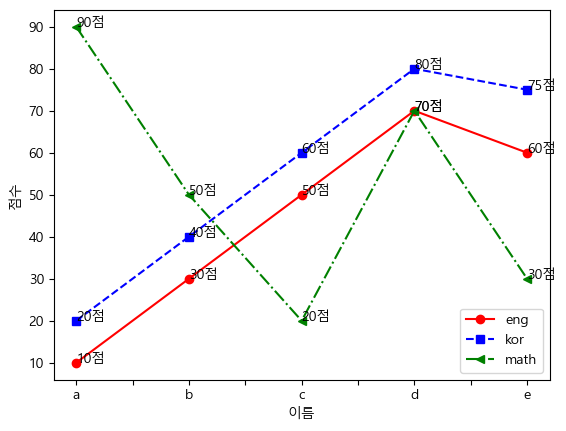

In [22]:
df.plot( style=['r-o','b--s','g-.<'], xlabel='이름', ylabel='점수')
# plt.text(0 , 10,'10점')
# plt.text(0 , 20,'20점')
# plt.text(0 , 90,'90점')
n=0
for i, sr in df.iterrows():
    eng , kor, math = sr.loc['eng'], sr.loc['kor'], sr.loc['math'] 
    plt.text(n , eng, f'{eng}점')
    plt.text(n , kor, f'{kor}점')
    plt.text(n , math, f'{math}점')
    n+=1
plt.show()

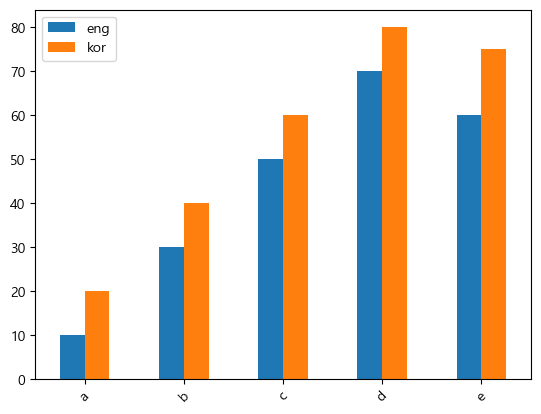

In [ ]:
df.plot(kind='bar', y=['eng','kor'], rot=45) # 영어랑 국어만 나오도록 지정
plt.show()

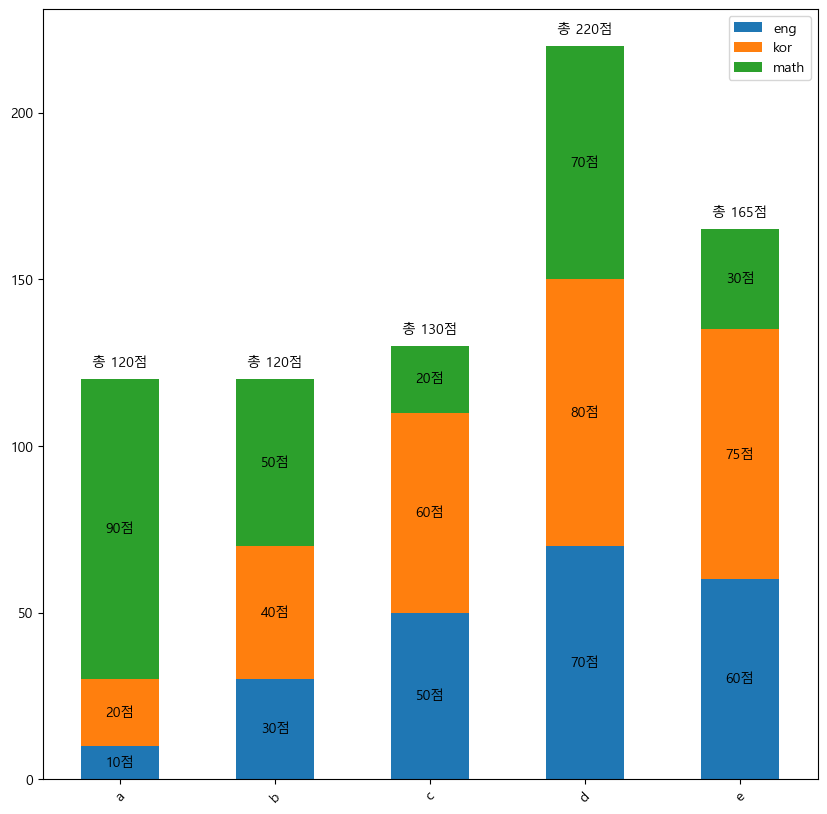

In [45]:
# 전체 총점
df.plot(kind='bar', stacked=True, rot=45, figsize=(10,10))
# plt.text(0, 10/2,'10점', va='center', ha='center')
# plt.text(0, 10+(20/2),'20점', va='center', ha='center')
# plt.text(0, 10+20+(90/2),'90점', va='center', ha='center')
n=0
for i, sr in df.iterrows():
    eng , kor, math = sr.loc['eng'], sr.loc['kor'], sr.loc['math'] 
    plt.text(n , eng/2, f'{eng}점', va='center', ha='center')
    plt.text(n ,eng+(kor/2), f'{kor}점', va='center', ha='center')
    plt.text(n , eng+kor+(math/2), f'{math}점', va='center', ha='center')
    plt.text(n , eng+kor+math+5, f'총 {eng+kor+math}점', va='center', ha='center')
    n+=1
plt.show()

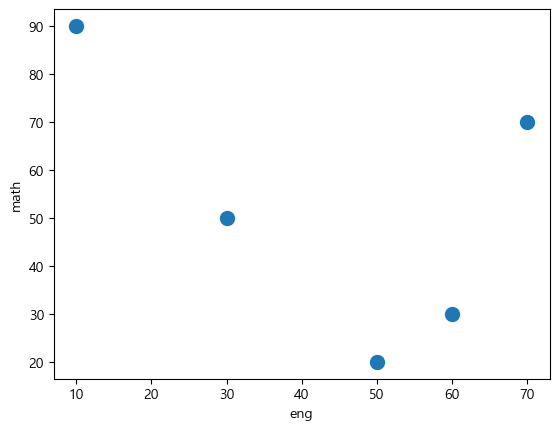

In [52]:
df.plot(kind='scatter', x='eng', y='math', s=100) #x,y축 지정
plt.show()

In [ ]:
df.corr() #상관관계 후 반드시 시각화 할 것

,eng,kor,math
eng,1.000000,0.996546,-0.485762
kor,0.996546,1.000000,-0.506362
math,-0.485762,-0.506362,1.000000


In [54]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


```text
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [ ]:
import seaborn as sb

https://matplotlib.org/stable/users/explain/colors/colormaps.html

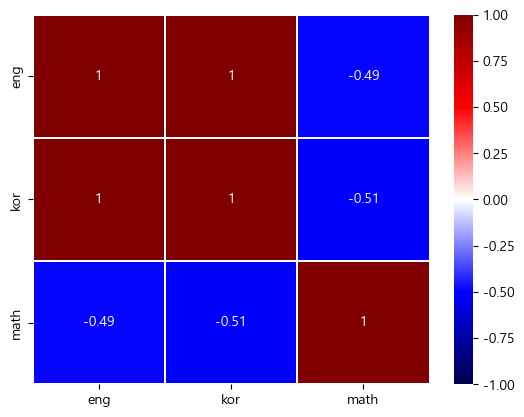

In [61]:
sb.heatmap( df.corr(), vmin=-1, vmax=1, 
           annot=True, cmap='seismic', linewidths=0.2)
plt.show()

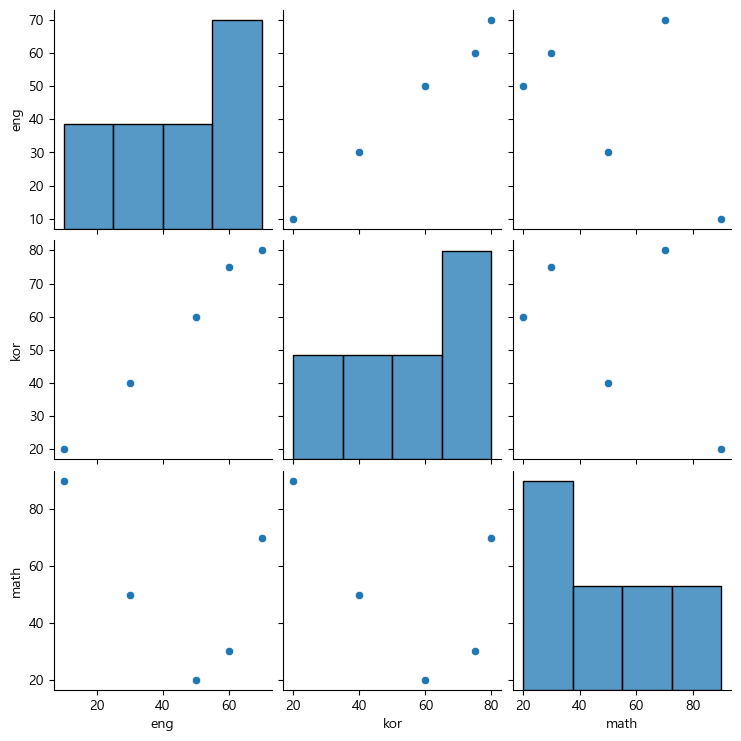

In [ ]:
sb.pairplot(df) # pairplot : 전체 컬럼의 scatter를 한 눈에 볼 수 있음.
plt.show()

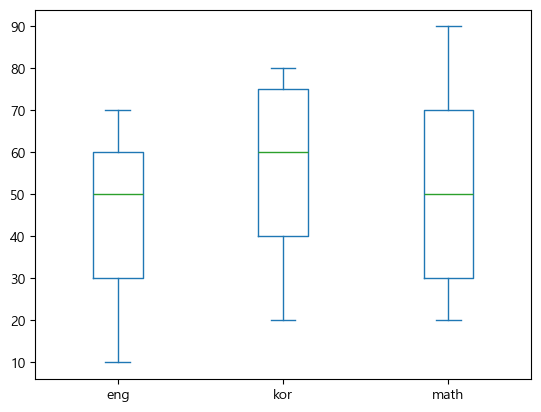

In [63]:
df.plot(kind='box')
plt.show()

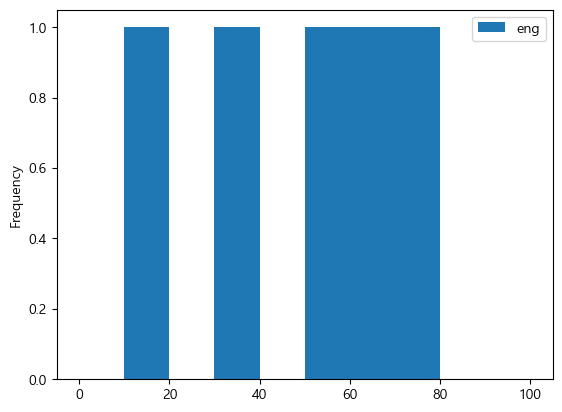

In [64]:
# bins = [0,10,20,.....,100]
df.plot(kind='hist', y='eng', bins=10, range=(0,100))
plt.show()

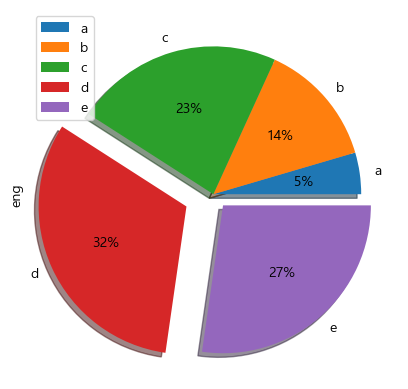

In [ ]:
# df['eng']/df['eng'].sum()*100
df.plot(kind='pie', y='eng', autopct='%2.f%%', 
        shadow=True, explode=[0, 0, 0, 0.2, 0.1]) #explode 파이 조각 떼어내듯이 분리 시키는 것
plt.show()

In [65]:
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70
e,60,75,30
